In [1]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [2]:
# Importing self-made libaries

import reload_lib as rl
import life_cycle_assessment_copy as lcc
import lcia_results as lr
import LCA_plots as lp


lib = [lcc, lp, lr]

In [6]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'

ecoinevnt_paths = {'ev391apos' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets",
                   'ev391consq' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets",
                   'ev391cutoff' : r"C:\Users\ruw\Downloads\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets"}
system_path = [r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case1.xlsx', 
                r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case2.xlsx']
rl.reload_lib(lib)

flow_legend, file_name, sheet_name, save_dir, initialization, file_name_unique_process = lcc.initilization(path, lcia_method, ecoinevnt_paths, system_path)

Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 2.94 seconds
Matching database: ev391apos
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Unlinked items after matching ev391apos: []
Applying strategy: link_iterable_by_fields
18 datasets
155 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case1_apos-unlinked.xlsx


0% [##################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/20/2025 08:54:57
  Finished: 01/20/2025 08:54:57
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 2.53
Created database: case1_apos
[]
case1_apos is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: con

Writing activities to SQLite3 database:


Unlinked items after matching ev391consq: []
Applying strategy: link_iterable_by_fields
25 datasets
176 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case1_consq-unlinked.xlsx


0% [#########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/20/2025 08:55:04
  Finished: 01/20/2025 08:55:04
  Total time elapsed: 00:00:00
  CPU %: 50.40
  Memory %: 2.49
Created database: case1_consq
[]
case1_consq is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: c

Writing activities to SQLite3 database:


Unlinked items after matching ev391cutoff: []
Applying strategy: link_iterable_by_fields
18 datasets
155 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case1_cut_off-unlinked.xlsx


0% [##################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/20/2025 08:55:10
  Finished: 01/20/2025 08:55:10
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 2.53
Created database: case1_cut_off
[]
case1_cut_off is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strate

Writing activities to SQLite3 database:


Unlinked items after matching ev391apos: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'DK', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_apos'}]
Applying strategy: link_iterable_by_fields
22 datasets
119 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case2_apos-unlinked.xlsx


0% [######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/20/2025 08:55:15
  Finished: 01/20/2025 08:55:15
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.59
Created database: case2_apos
[]
case2_apos is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: conv

Writing activities to SQLite3 database:


Unlinked items after matching ev391consq: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'DK', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_consq'}]
Applying strategy: link_iterable_by_fields
23 datasets
125 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case2_consq-unlinked.xlsx


0% [#######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/20/2025 08:55:20
  Finished: 01/20/2025 08:55:20
  Total time elapsed: 00:00:00
  CPU %: 195.30
  Memory %: 2.53
Created database: case2_consq
[]
case2_consq is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: 

Writing activities to SQLite3 database:


Unlinked items after matching ev391cutoff: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'DK', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_apos'}, {'name': 'scalpel', 'amount': 1, 'reference product': 'scalpel', 'location': 'GLO', 'unit': 'unit', 'categories': 0, 'type': 'production', 'database': 'case2_apos'}]
Applying strategy: link_iterable_by_fields
21 datasets
117 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case2_cut_off-unlinked.xlsx


0% [#####################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/20/2025 08:55:25
  Finished: 01/20/2025 08:55:25
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.57
Created database: case2_cut_off
[]
case2_cut_off is loaded into the database
case1_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_apos
case1_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_consq
case1_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_cut_off
case2_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_apos
case2_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_consq
case2_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_cut_off


In [8]:
rl.reload_lib(lib)

df, plot_x_axis_all, impact_categories, unique = {}, {}, {}, {}
for key, item in initialization.items():
    print(f"Perfoming LCA for {key}")
    # print(file_name_unique_process[key])
    df[key], plot_x_axis_all[key], impact_categories[key], unique[key] = lr.quick_LCIA(item, file_name[key], file_name_unique_process[key], sheet_name[key])
    print()

Perfoming LCA for case1_apos
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case1_consq
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case1_cut_off
Recipe is selected
Initialization is completed
Calculating for 21 methods and 21 activities : Total calculations 441
DataFrame with nested lists written to Excel successfully.
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_apos
Recipe is selected
Initialization is completed
Calculating for 21 methods and 17 activities : Total calculations 357
DataFrame with nested lists written to Excel successfully.
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_consq
Recipe is selected
Initialization is completed
Calculating for 21 methods and 17 activities : Total calculations 357
DataFrame with nested lists written to Excel su

In [9]:
case_keys = [key for key in initialization.keys()]
leg_pos_scaled = {
    'case1' : 0.65,
    'case2' : 0.909
}

leg_pos_gwp = {
    'case1' : 0.652,
    'case2' : 0.652
}

y_min_gwp =  {
    case_keys[0] : -0.6,    #case1 apos
    case_keys[1] : -0.4,    #case1 consq    
    case_keys[2] : -0.6,      #case1 cut off
    case_keys[3] : -0.4,      #case2 apos
    case_keys[4] : -0.2,      #case2 consq
    case_keys[5] : -0.4       #case2 cut off
}

y_max_gwp =  {
    case_keys[0] : 1.6,     #case1 apos
    case_keys[1] : 1.4,     #case1 consq
    case_keys[2] : 1.6,       #case1 cut off
    case_keys[3] : 1.6,       #case2 apos
    case_keys[4] : 1.6,       #case2 consq
    case_keys[5] : 1.6        #case2 cut off
}

y_step_gwp =  {
    case_keys[0] : 0.2,     #case1 apos
    case_keys[1] : 0.2,     #case1 consq
    case_keys[2] : 0.2,     #case1 cut off
    case_keys[3] : 0.2,     #case2 apos
    case_keys[4] : 0.2,     #case2 consq
    case_keys[5] : 0.2      #case2 cut off
}


amount_of_uses = {
    'case1' : 513,
    'case2' : 250
}

y_max_be =  {
    case_keys[0] : [300, 700],  #case1 apos
    case_keys[1] : [225, 600],  #case1 consq
    case_keys[2] : [300, 650],  #case1 cut off
    case_keys[3] : [300, 650],  #case2 apos
    case_keys[4] : [375, 650],  #case2 conqs
    case_keys[5] : [300, 650]   #case2 cut off
}

y_step_be =  {
    case_keys[0] : [25, 50],    #case1 apos
    case_keys[1] : [25, 50],    #case1 consq
    case_keys[2] : [25, 50],    #case1 cut off
    case_keys[3] : [25, 50],    #case2 apos
    case_keys[4] : [25, 50],    #case2 consq
    case_keys[5] : [25, 50]     #case2 cut off
}

x_step_be =  {
    'case1' : 50,
    'case2' : 25
}

break_even_product = {
    'case1' : 'container',
    'case2' : 'electro surgery'
}

plot_structure = [
    leg_pos_scaled,
    leg_pos_gwp,
    y_min_gwp,
    y_max_gwp,
    y_step_gwp,
    amount_of_uses,
    y_max_be,
    y_step_be,
    x_step_be,
    break_even_product
]

In [15]:
string = impact_categories['case1_apos'][0][0]
string = string.replace(' Runes edition', '')
string

'ReCiPe 2016 v1.03, midpoint (H)'

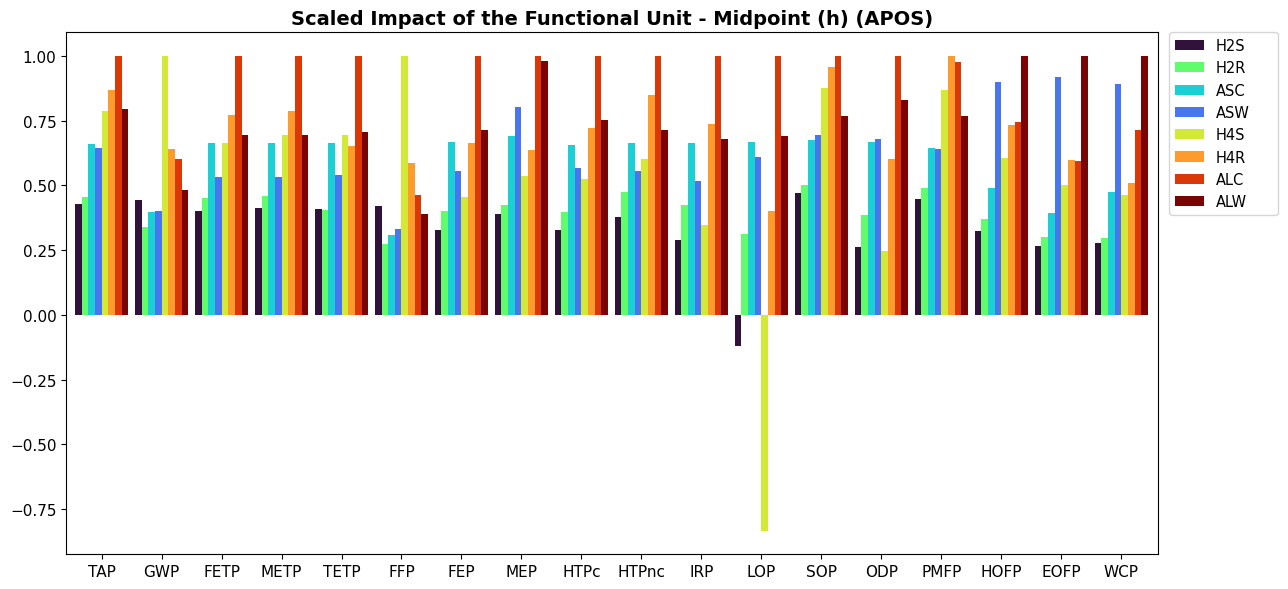

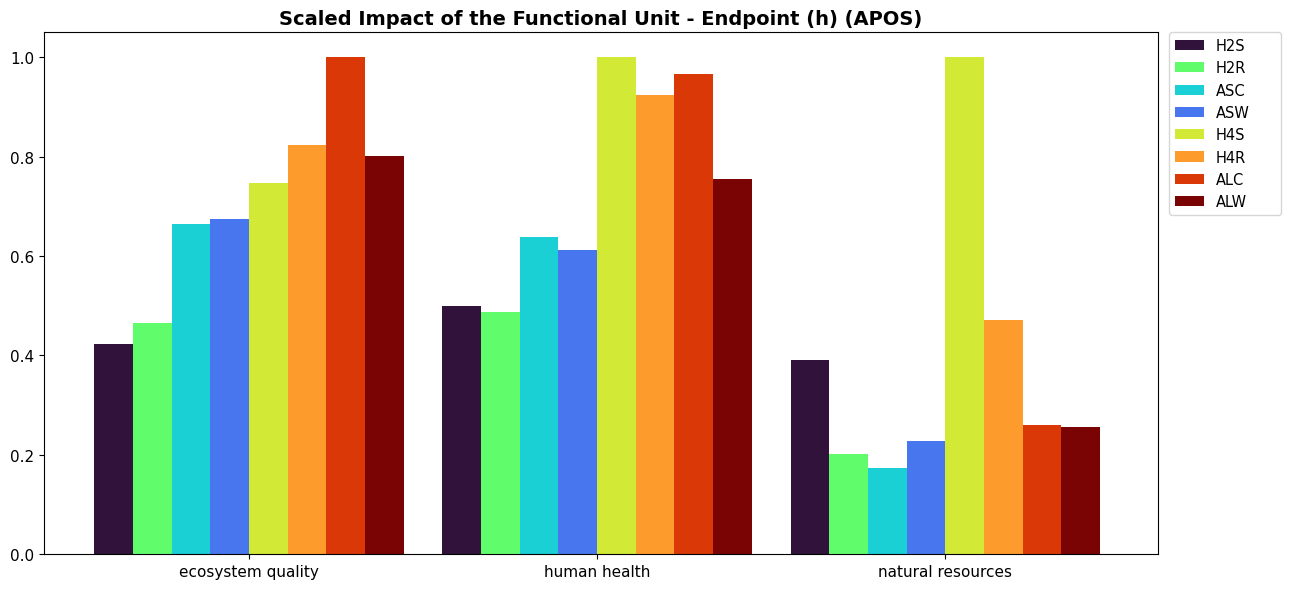

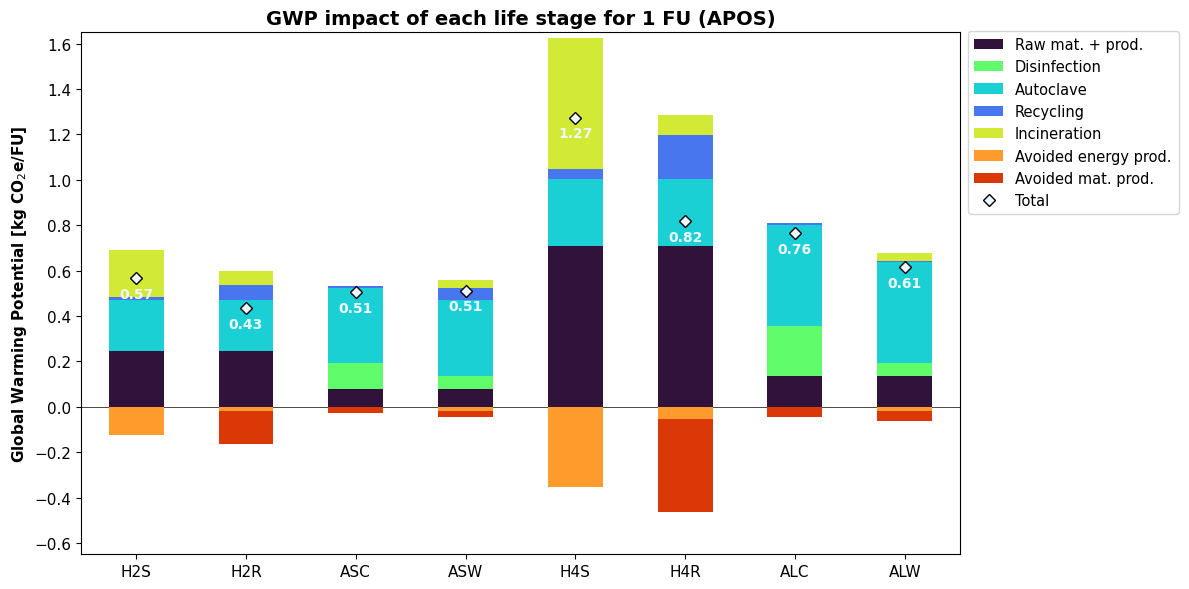

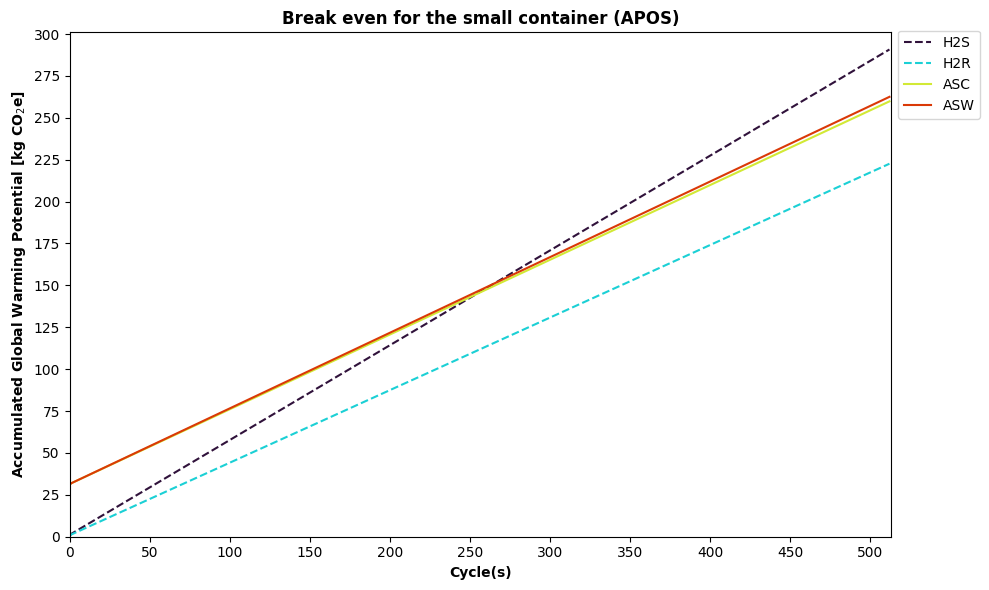

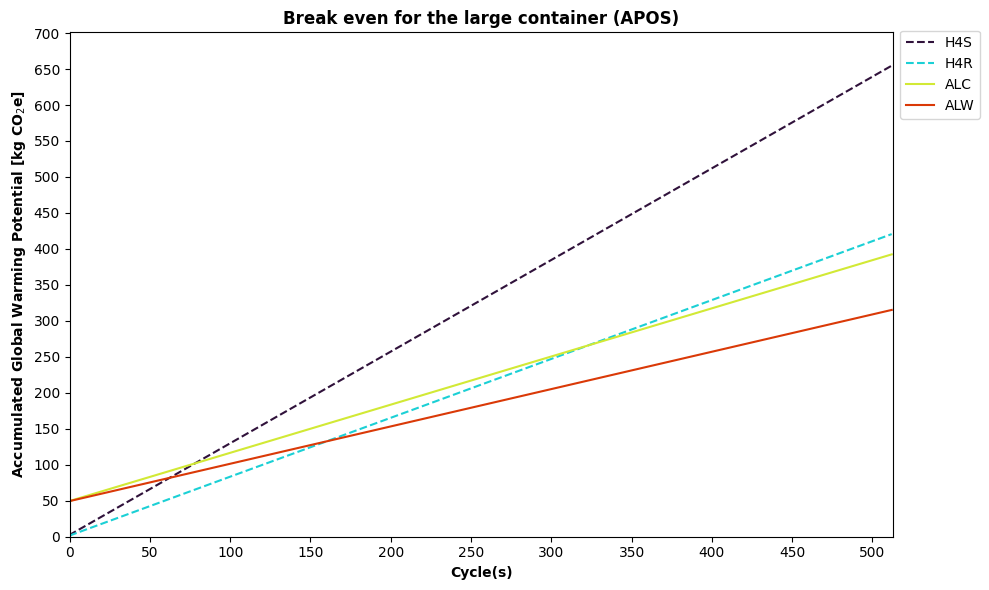

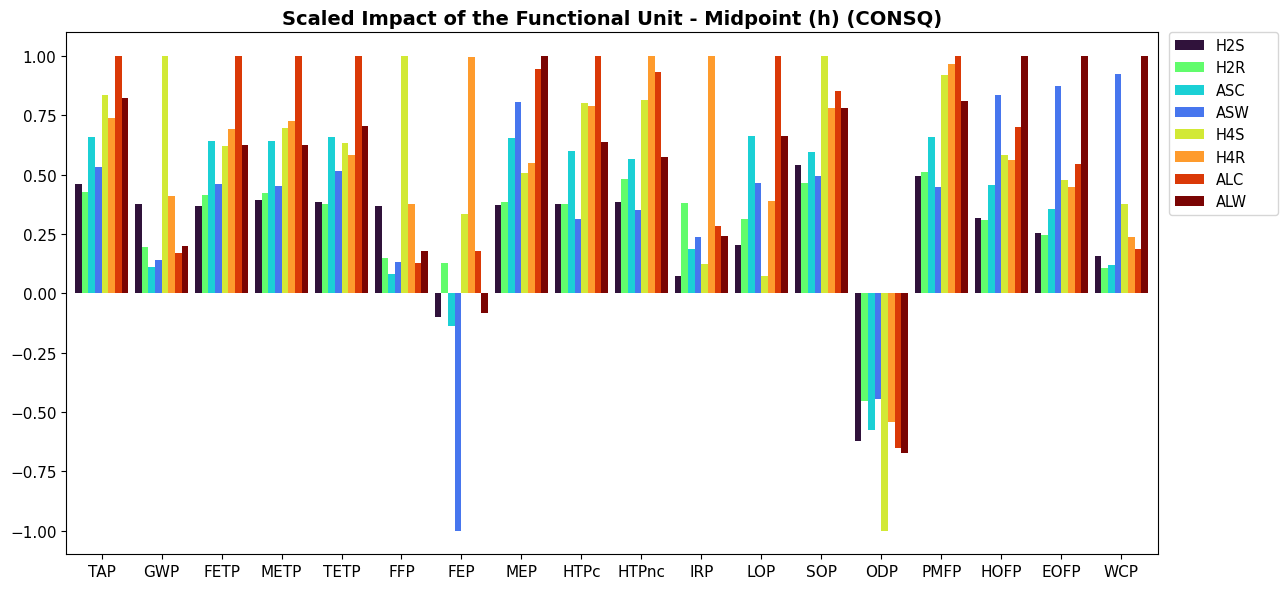

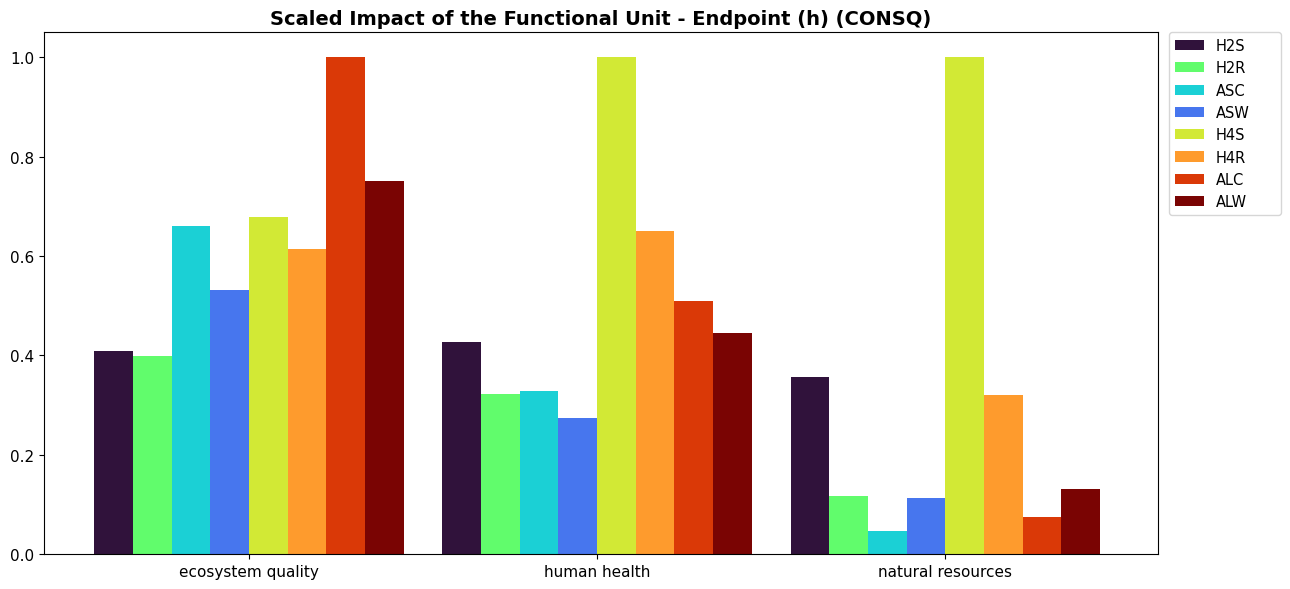

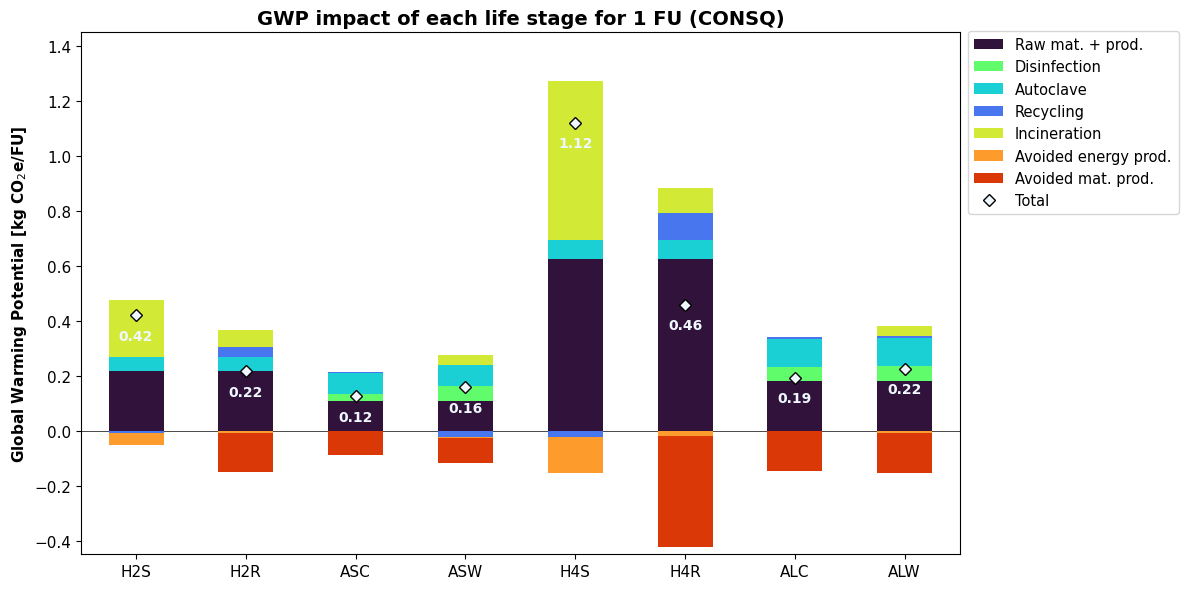

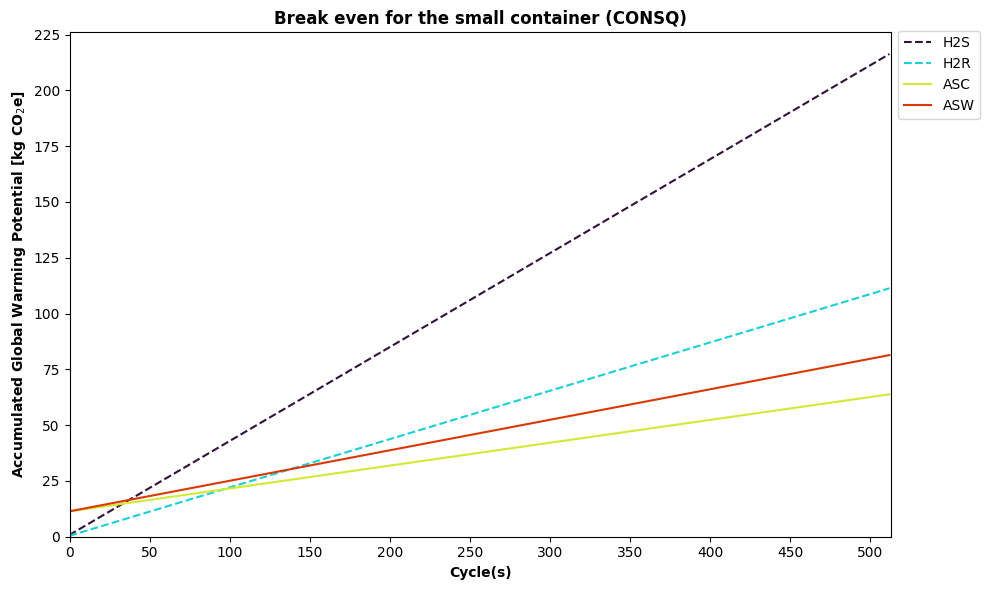

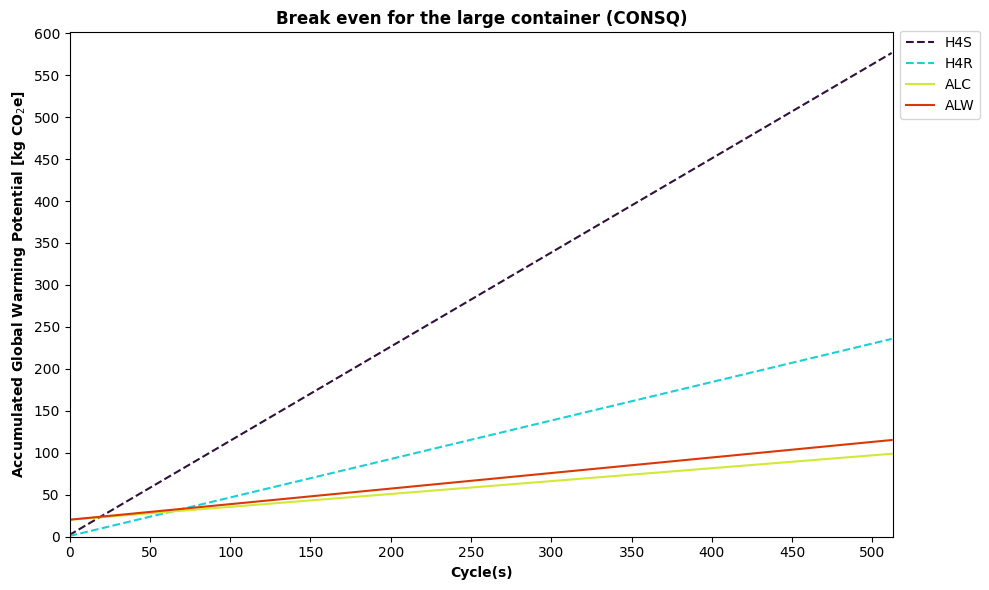

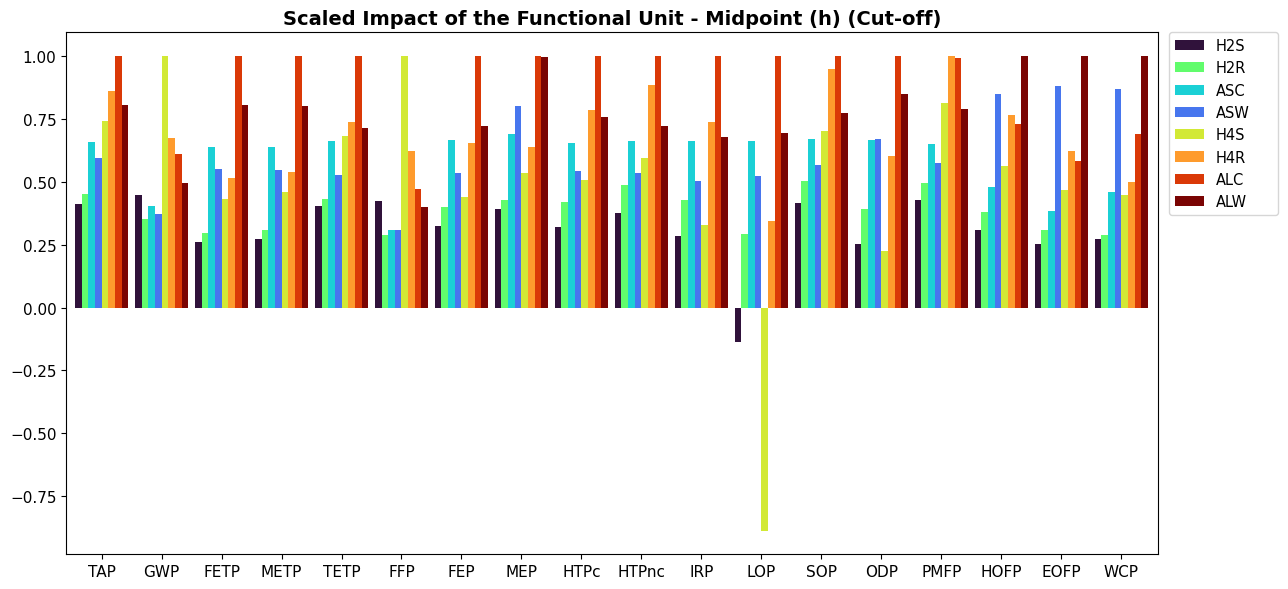

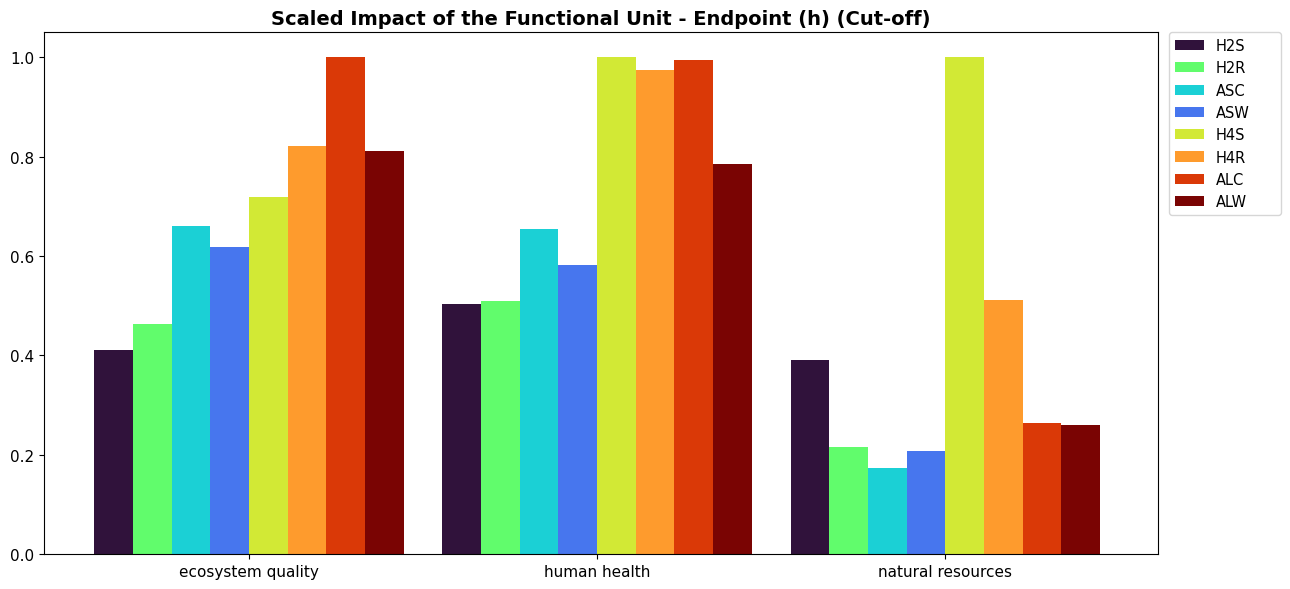

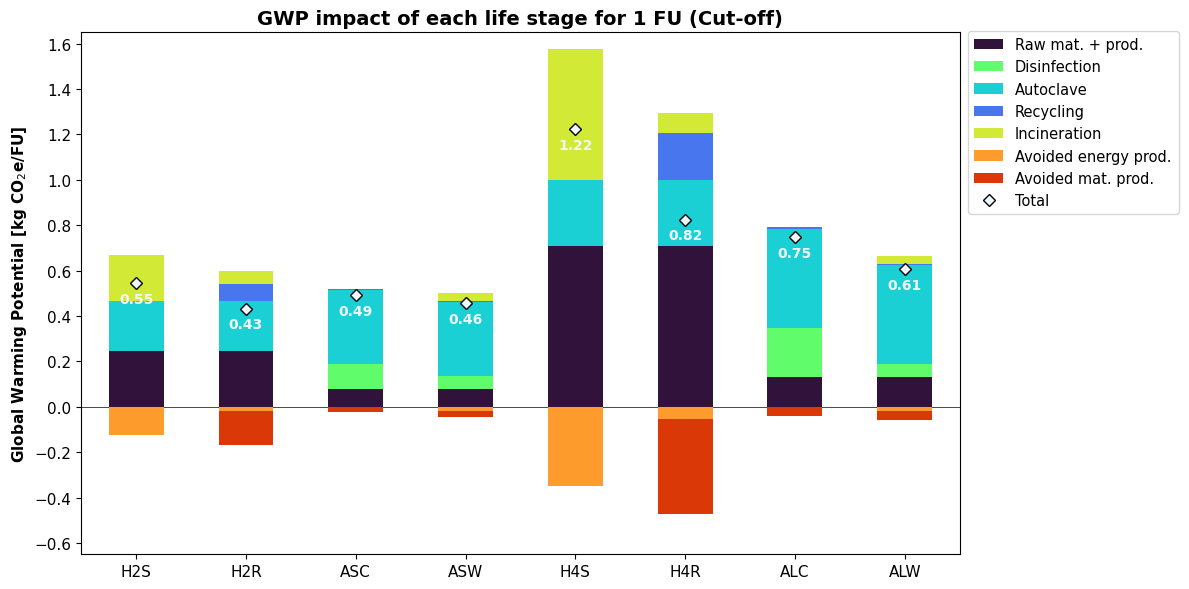

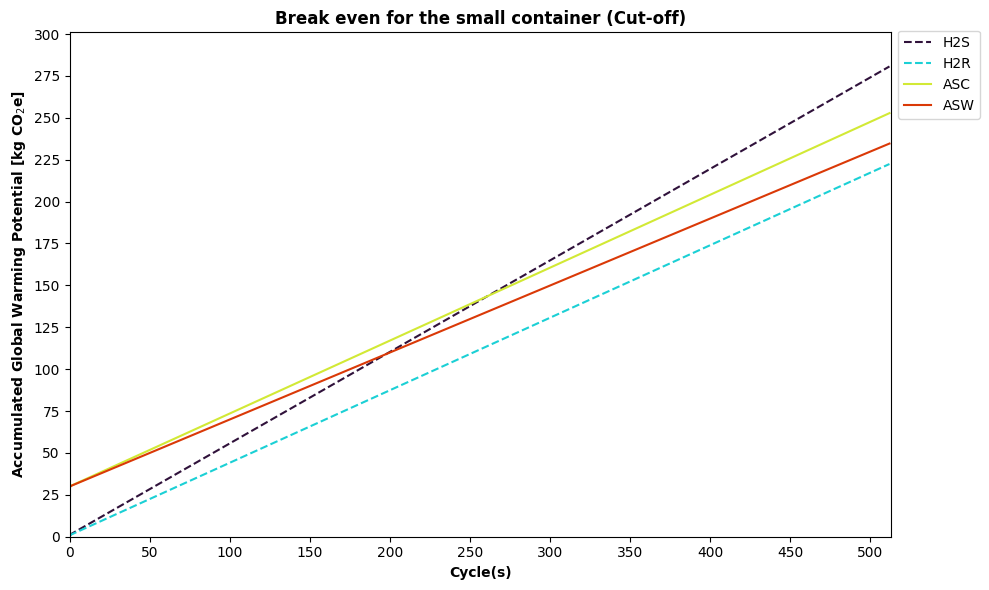

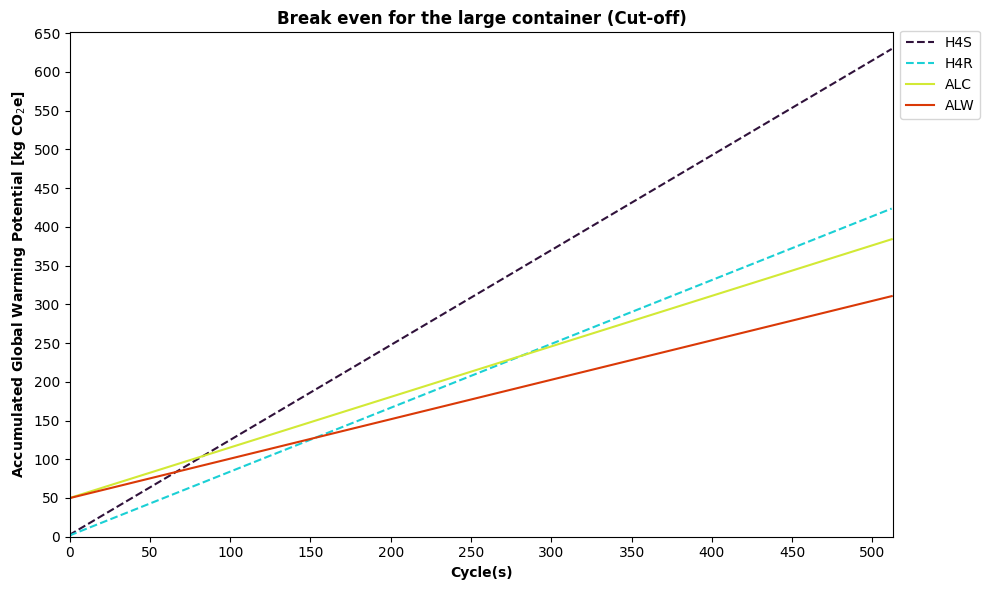

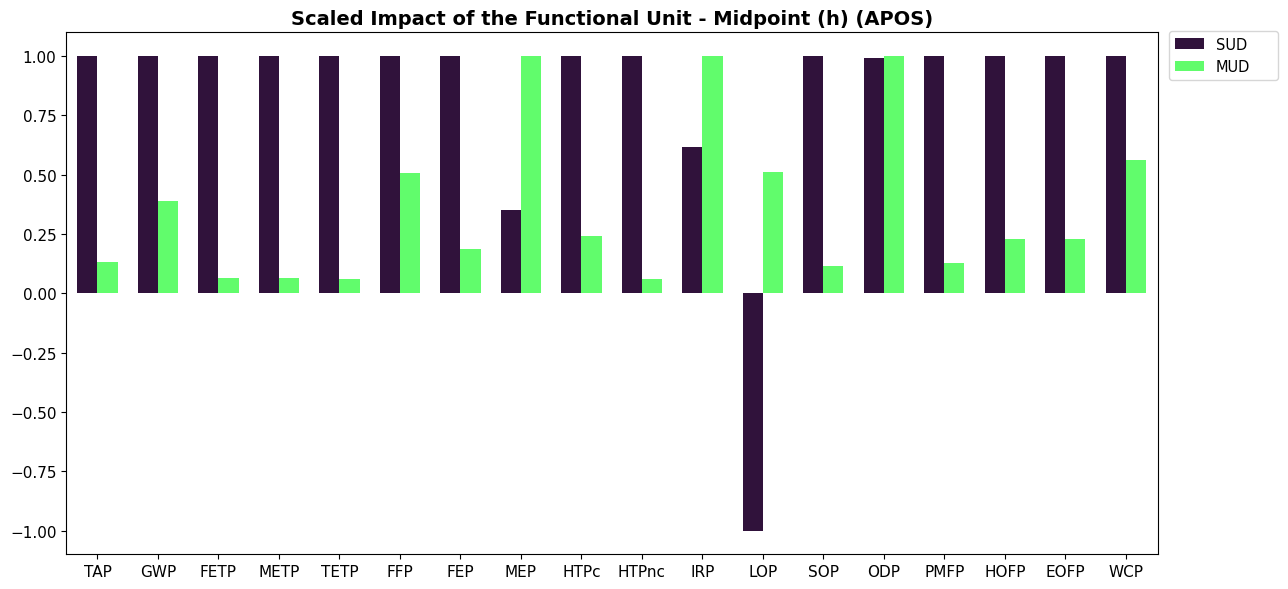

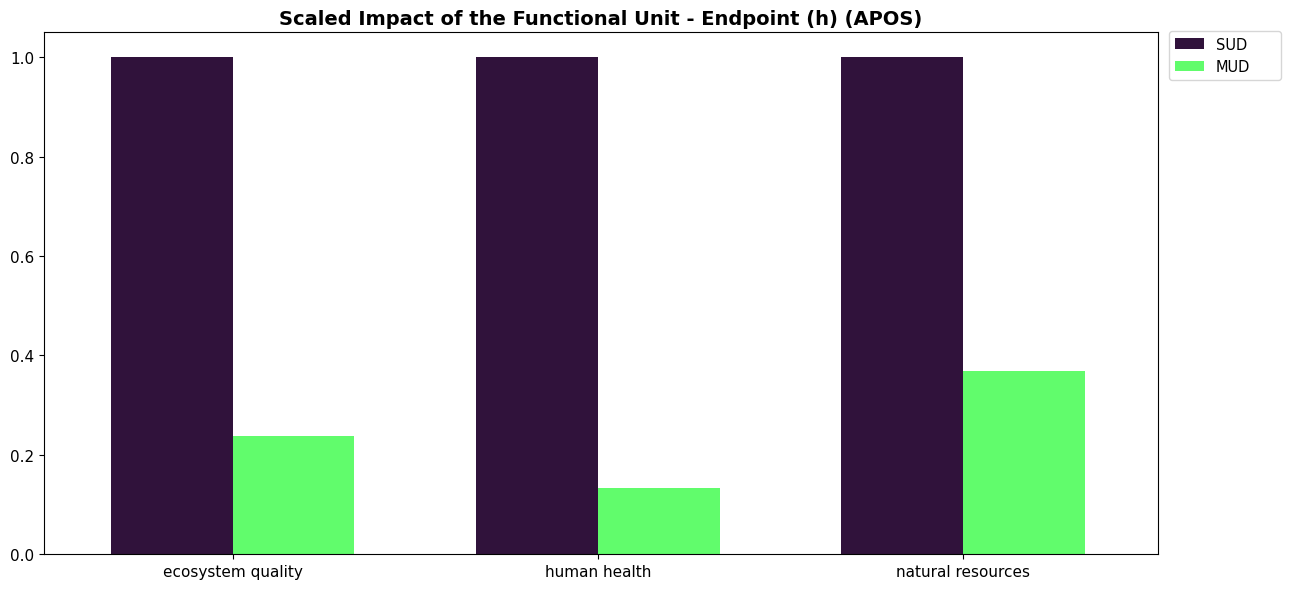

'H200 SU' (unit, GLO, None) 0.0857768559144634


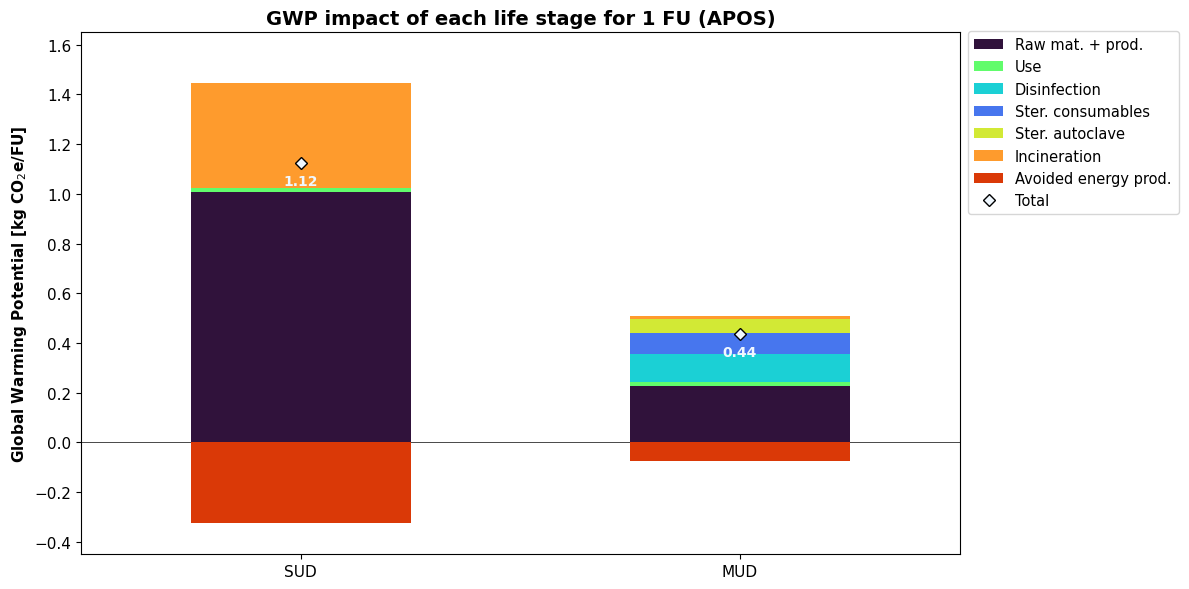

'H200 SU' (unit, GLO, None) 0.0857768559144634


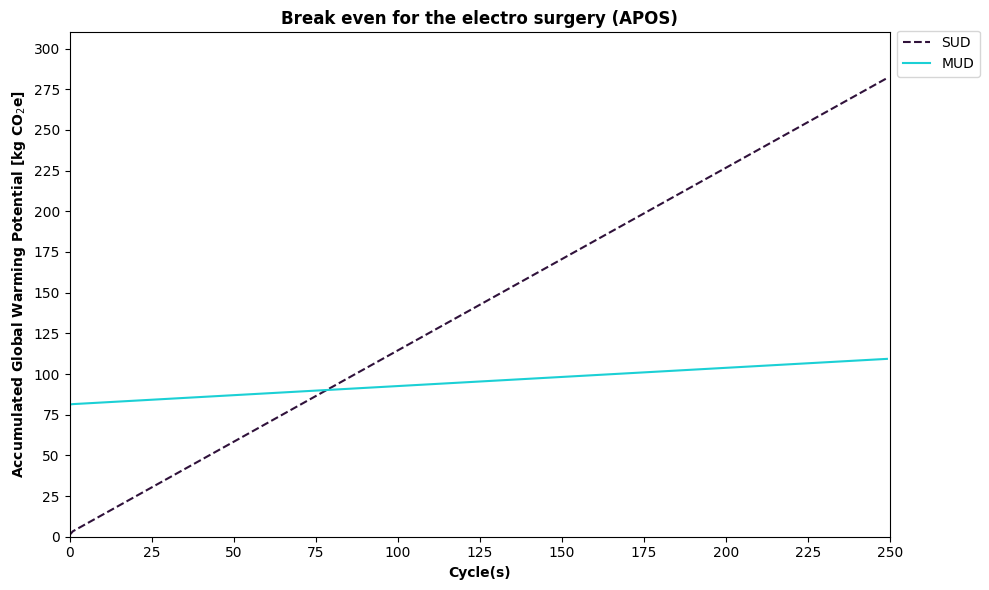

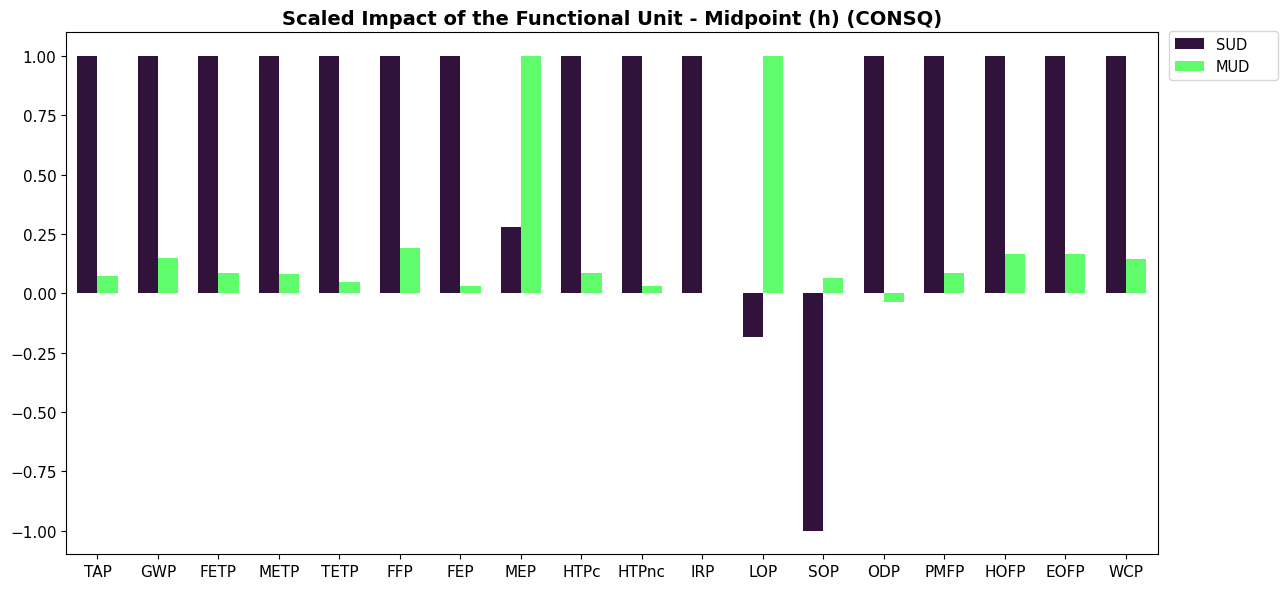

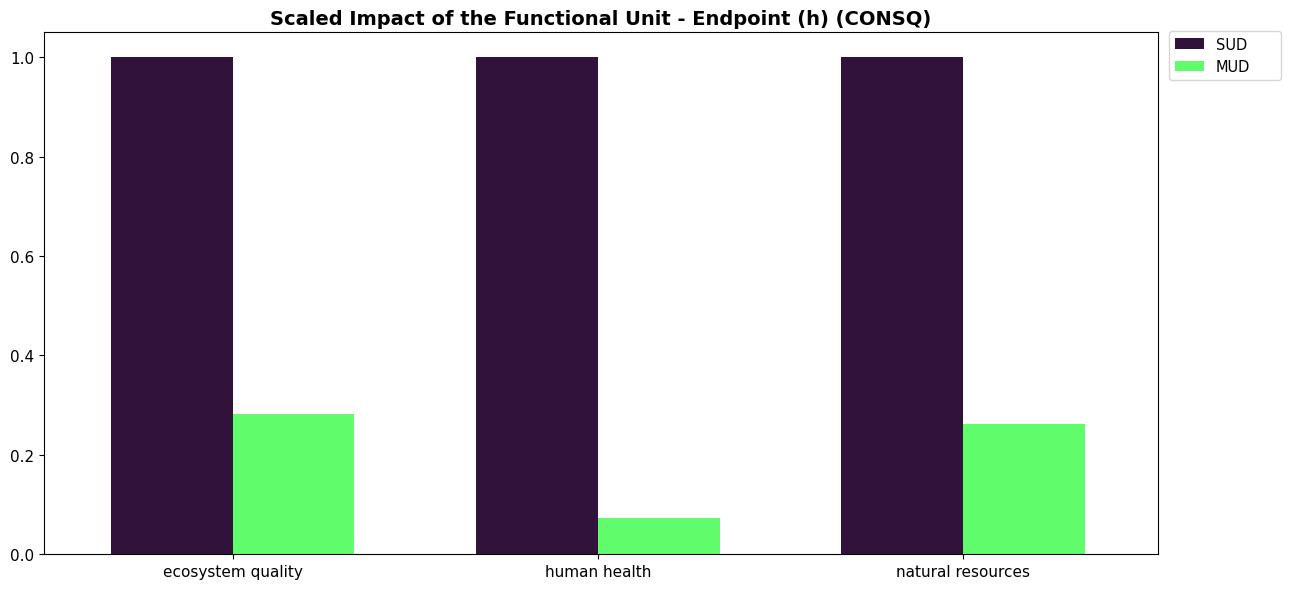

'H200 SU' (unit, GLO, None) 0.0923677731039343


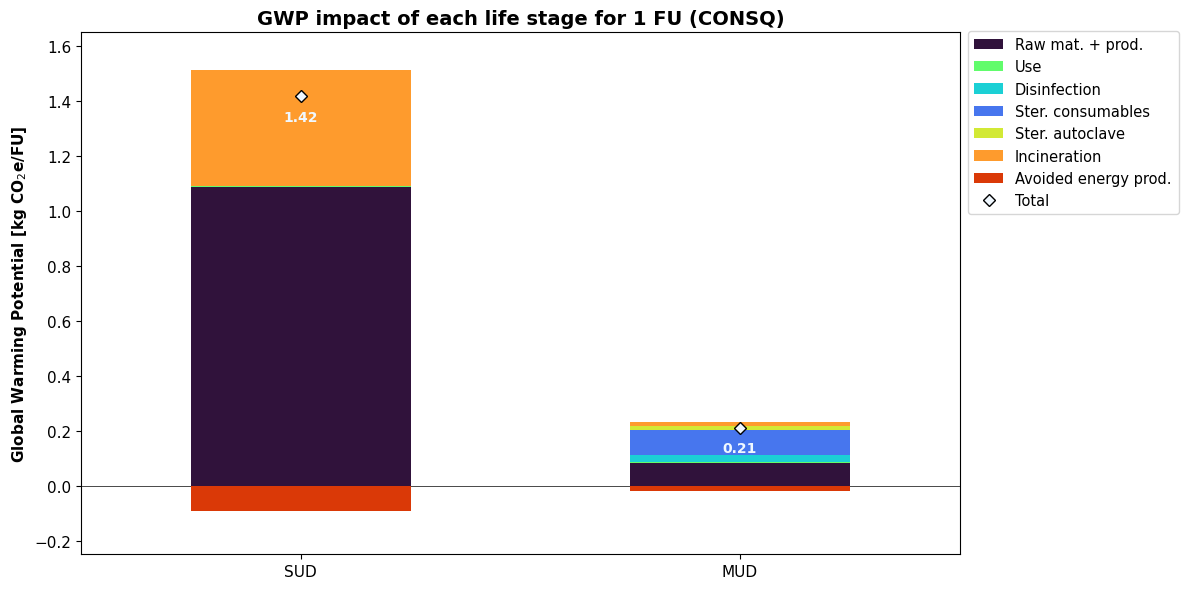

'H200 SU' (unit, GLO, None) 0.0923677731039343


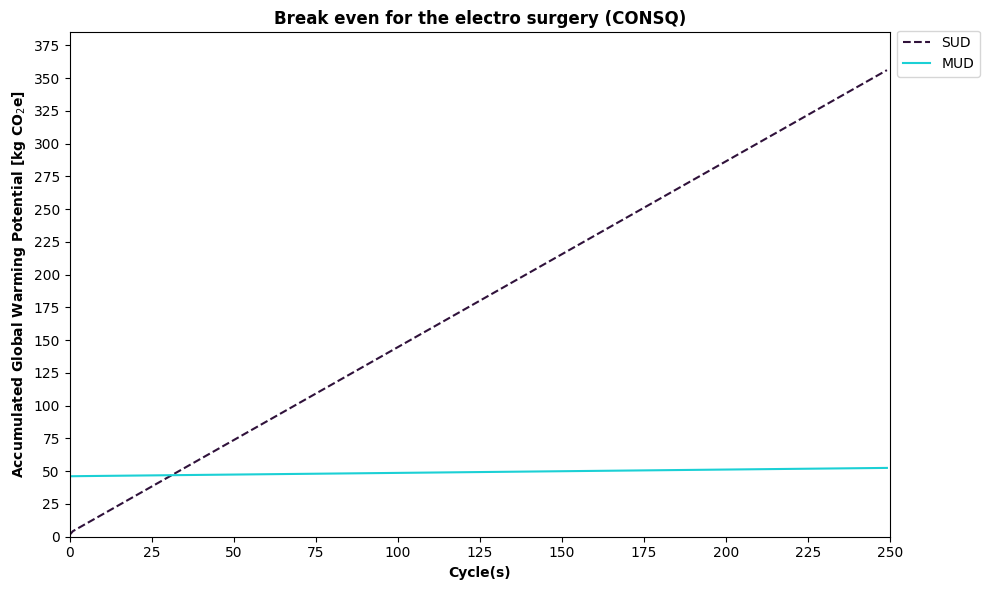

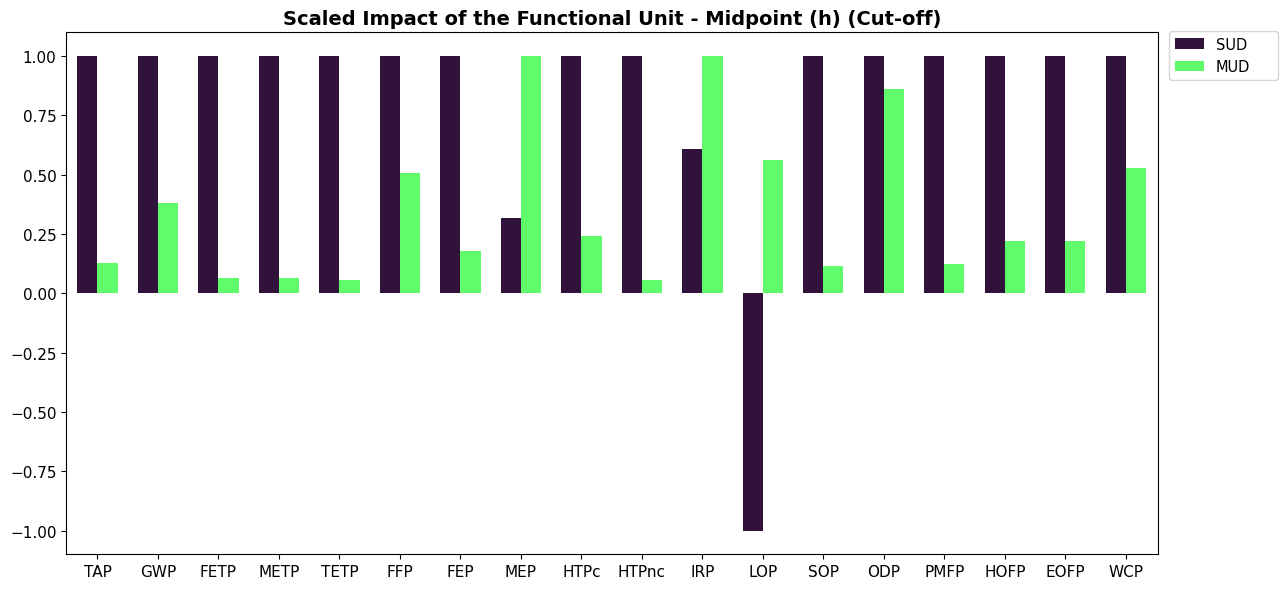

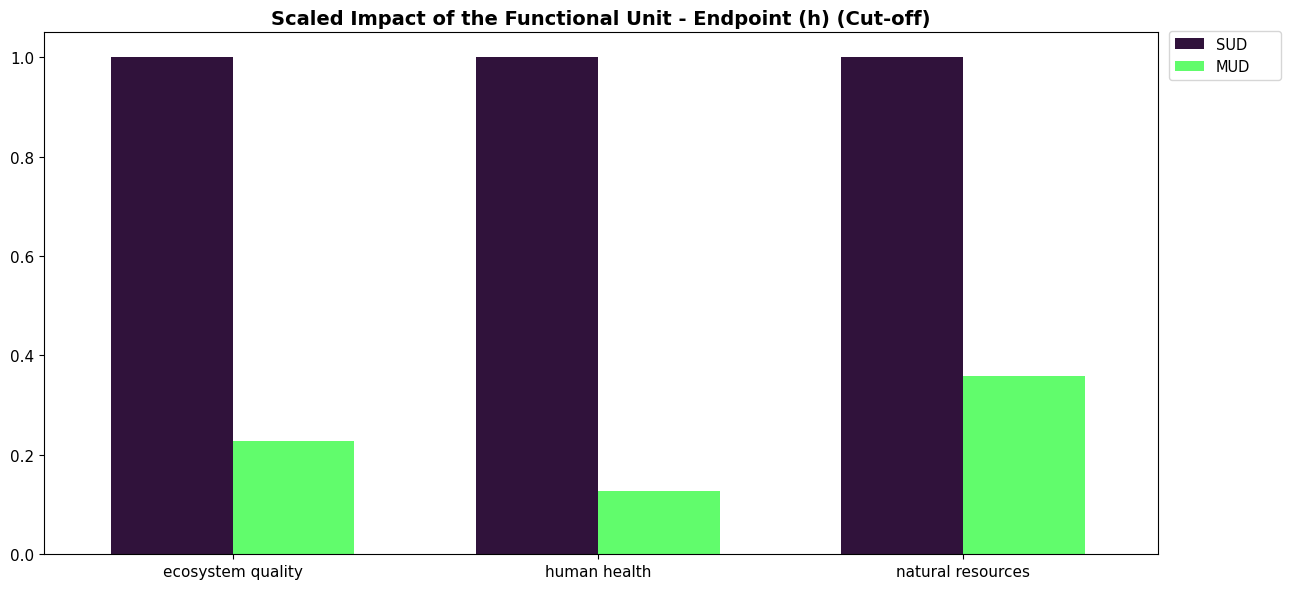

'H200 SU' (unit, GLO, None) 0.08203926167329358


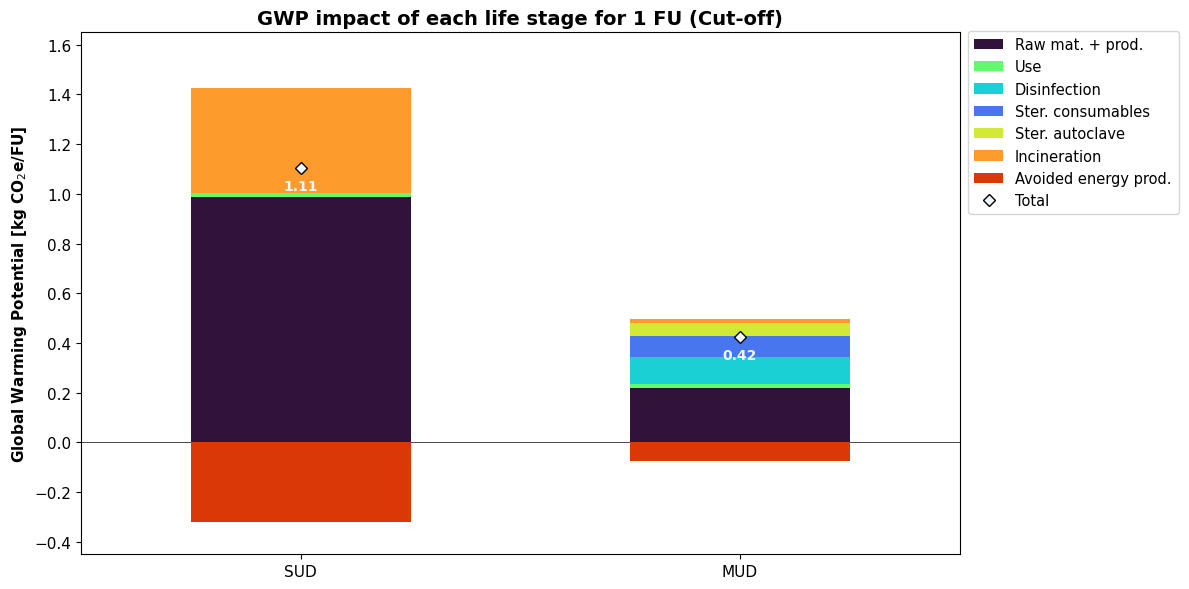

'H200 SU' (unit, GLO, None) 0.08203926167329358


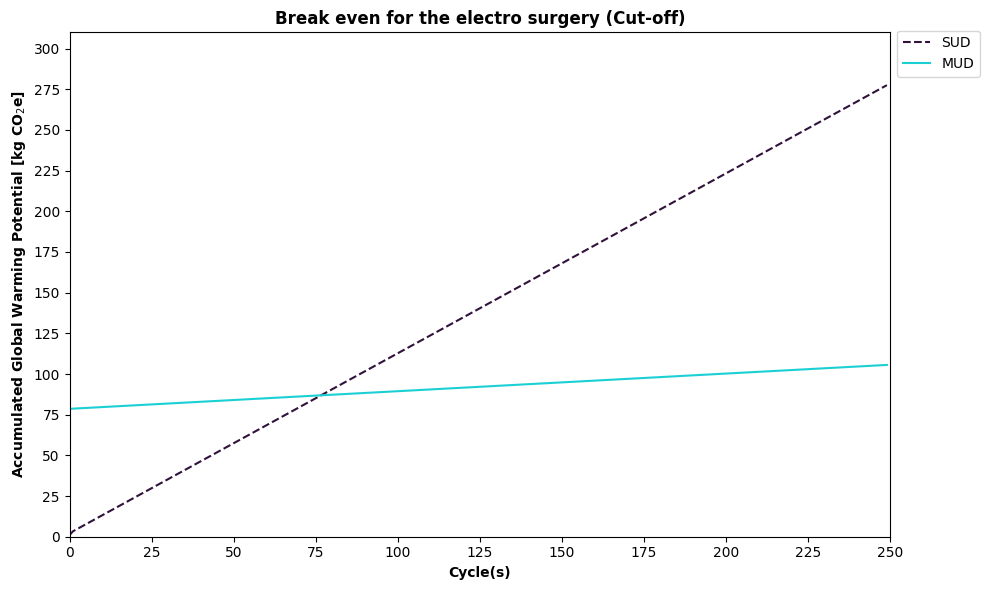

In [29]:
rl.reload_lib(lib)



lp.create_results_graphs(initialization, df, plot_x_axis_all, save_dir, impact_categories, flow_legend, plot_structure)